# EDA for MOBILE Specifications and Price.

In [290]:
!pip install numpy pandas matplotlib seaborn

In [291]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [292]:
data=pd.read_csv("C:/Rakesh_DS/DataSet/Mobiles.csv", encoding='latin1')
print(data.columns)


Index(['Company Name', 'Model Name', 'Mobile Weight', 'RAM', 'Front Camera',
       'Back Camera', 'Processor', 'Battery Capacity', 'Screen Size',
       'Launched Price (Pakistan)', 'Launched Price (India)',
       'Launched Price (China)', 'Launched Price (USA)',
       'Launched Price (Dubai)', 'Launched Year'],
      dtype='object')


In [293]:
# Check for missing values
print(data.isnull().sum())

Company Name                 0
Model Name                   0
Mobile Weight                0
RAM                          0
Front Camera                 0
Back Camera                  0
Processor                    0
Battery Capacity             0
Screen Size                  0
Launched Price (Pakistan)    0
Launched Price (India)       0
Launched Price (China)       0
Launched Price (USA)         0
Launched Price (Dubai)       0
Launched Year                0
dtype: int64


No Missing/Null values in the data...

In [294]:
print(data[data['Model Name']=='80']['Model Name'].to_list())


['80']


If we see the data, we can see that there are some rows which consists of some values instead of Model name in the Model Name Column. So, we will remove those rows from the data.

In [295]:
# Filter out rows where 'Model Name' consists of integer strings
data = data[~data['Model Name'].str.contains(r'^\d+$')]

# Display the result
print(data['Model Name'].to_list())
print(data[data['Model Name']=='80']['Model Name'].to_list())

['iPhone 16 128GB', 'iPhone 16 256GB', 'iPhone 16 512GB', 'iPhone 16 Plus 128GB', 'iPhone 16 Plus 256GB', 'iPhone 16 Plus 512GB', 'iPhone 16 Pro 128GB', 'iPhone 16 Pro 256GB', 'iPhone 16 Pro 512GB', 'iPhone 16 Pro Max 128GB', 'iPhone 16 Pro Max 256GB', 'iPhone 16 Pro Max 512GB', 'iPhone 15 128GB', 'iPhone 15 256GB', 'iPhone 15 512GB', 'iPhone 15 Plus 128GB', 'iPhone 15 Plus 256GB', 'iPhone 15 Plus 512GB', 'iPhone 15 Pro 128GB', 'iPhone 15 Pro 256GB', 'iPhone 15 Pro 512GB', 'iPhone 15 Pro Max 128GB', 'iPhone 15 Pro Max 256GB', 'iPhone 15 Pro Max 512GB', 'iPhone 14 128GB', 'iPhone 14 256GB', 'iPhone 14 512GB', 'iPhone 14 Plus 128GB', 'iPhone 14 Plus 256GB', 'iPhone 14 Plus 512GB', 'iPhone 14 Pro 128GB', 'iPhone 14 Pro 256GB', 'iPhone 14 Pro 512GB', 'iPhone 14 Pro Max 128GB', 'iPhone 14 Pro Max 256GB', 'iPhone 14 Pro Max 512GB', 'iPhone 13 mini 128GB', 'iPhone 13 mini 256GB', 'iPhone 13 mini 512GB', 'iPhone 13 128GB', 'iPhone 13 256GB', 'iPhone 13 512GB', 'iPhone 13 Pro 128GB', 'iPhone 13

The unrelated rows were deducted with having the values in the Model Name Column as 80,90...

Checking for Duplicates in the data...  and if found, removing them from the data...

In [296]:
# Check for duplicates in the 'Model Name' column
duplicates = data['Model Name'].duplicated(keep=False).sum()

# Display the duplicates
print(duplicates)

42


In [297]:
# Remove duplicates based on 'Model Name' column
data = data.drop_duplicates(subset='Model Name', keep='first')

# Display the result
print(data['Model Name'].duplicated().sum())  # Should print 0 indicating no duplicates

0


Captializing 'Company Name' to avoid Duplicates with the same name in different cases...

In [298]:
print(data['Company Name'].value_counts())
data['Company Name']=data['Company Name'].str.capitalize()
print(data['Model Name'].head())

Company Name
Oppo        113
Apple        97
Samsung      88
Vivo         86
Honor        85
Realme       66
Motorola     62
Infinix      55
OnePlus      53
Huawei       42
Tecno        39
POCO         30
Xiaomi       27
Google       21
Lenovo       15
Nokia        11
Sony          9
Poco          2
iQOO          1
Name: count, dtype: int64
0         iPhone 16 128GB
1         iPhone 16 256GB
2         iPhone 16 512GB
3    iPhone 16 Plus 128GB
4    iPhone 16 Plus 256GB
Name: Model Name, dtype: object


# Oppo has been producing more Model mobiles than compared to any other Company


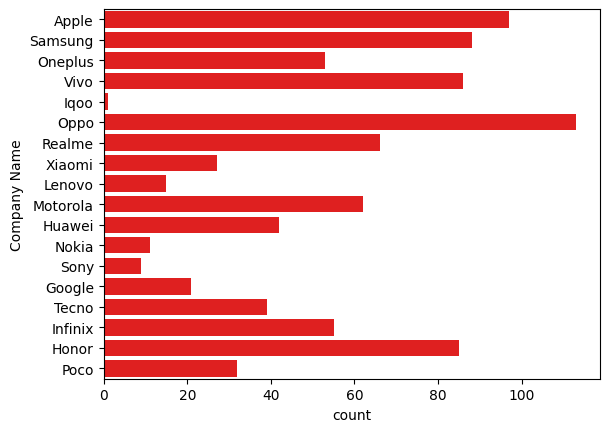

In [299]:
# lets see through the graph
sns.countplot(data['Company Name'],color='red')
plt.show()

In [300]:
print(data.isnull().sum())

Company Name                 0
Model Name                   0
Mobile Weight                0
RAM                          0
Front Camera                 0
Back Camera                  0
Processor                    0
Battery Capacity             0
Screen Size                  0
Launched Price (Pakistan)    0
Launched Price (India)       0
Launched Price (China)       0
Launched Price (USA)         0
Launched Price (Dubai)       0
Launched Year                0
dtype: int64


In [301]:
data['RAM']=data['RAM'].str.split('GB').str[0].astype(float)
data.rename(columns={'RAM': 'RAM(GB)'}, inplace=True)
print(data['RAM(GB)'].head())

0    6.0
1    6.0
2    6.0
3    6.0
4    6.0
Name: RAM(GB), dtype: float64


C:\Users\rponkam\AppData\Local\Temp\ipykernel_4108\589338194.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Company Name', y='AVG Weight', data=avg_weight_per_company, palette='viridis')


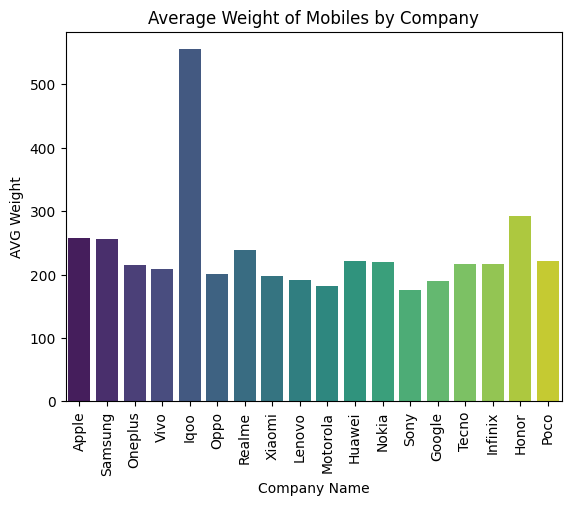

In [302]:
data['Mobile Weight']=data['Mobile Weight'].str.split('g').str[0].astype(float)
data["AVG Weight"]=data['Mobile Weight'].groupby(data['Company Name']).transform('mean')

avg_weight_per_company = data[['Company Name', 'AVG Weight']].drop_duplicates()
sns.barplot(x='Company Name', y='AVG Weight', data=avg_weight_per_company, palette='viridis')
plt.xticks(rotation=90)
plt.title('Average Weight of Mobiles by Company')
plt.show()



Here Avg Weight of a Company mobile/Tab is higer for IQ00 , since it is producing more no of tabs

and Light weight Moble company is Sony.

In [303]:
print(data.iloc[:, -7:-2])

    Launched Price (Pakistan) Launched Price (India) Launched Price (China)  \
0                 PKR 224,999             INR 79,999              CNY 5,799   
1                 PKR 234,999             INR 84,999              CNY 6,099   
2                 PKR 244,999             INR 89,999              CNY 6,499   
3                 PKR 249,999             INR 89,999              CNY 6,199   
4                 PKR 259,999             INR 94,999              CNY 6,499   
..                        ...                    ...                    ...   
925                PKR 66,220             INR 23,999              CNY 2,099   
926                PKR 71,220             INR 25,999              CNY 2,299   
927               PKR 604,999            INR 164,999                ¥13,999   
928               PKR 544,999            INR 176,999             CNY 15,999   
929             Not available            INR 200,999            CNY 17,999    

    Launched Price (USA) Launched Price (Dubai)  
0

C:\Users\rponkam\AppData\Local\Temp\ipykernel_4108\3492468356.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='Company Name', y='AVG Battery Capacity', data=avg_battery_capacity_per_company, marker='o', palette='viridis')


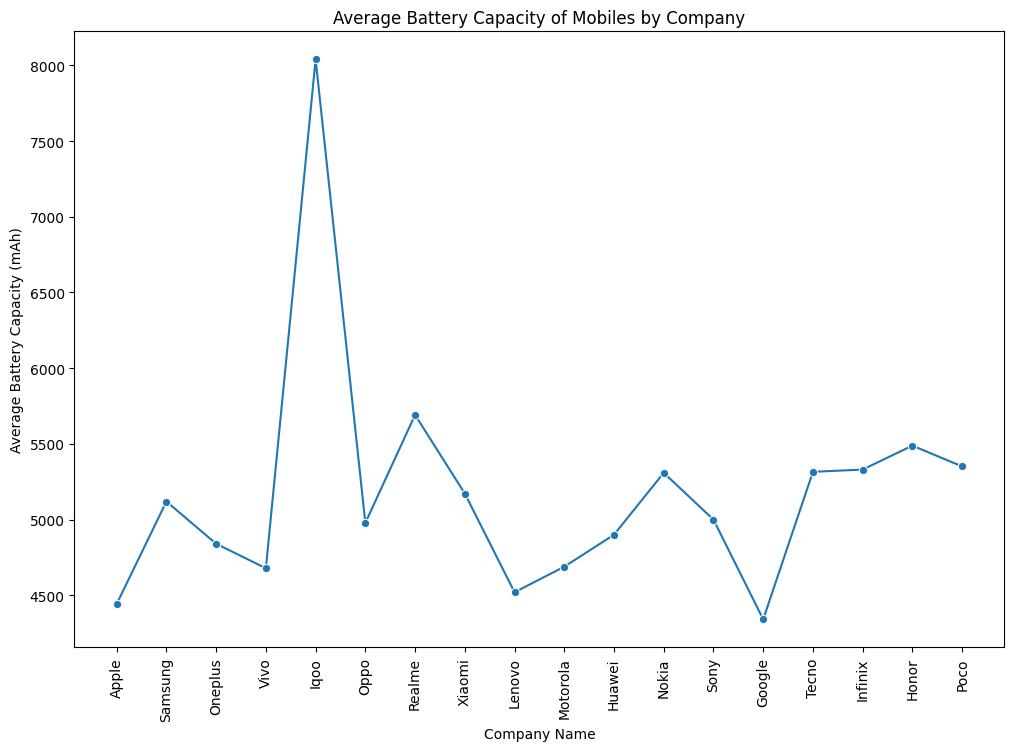

In [304]:
plt.figure(figsize=(12, 8))
sns.lineplot(x='Company Name', y='AVG Battery Capacity', data=avg_battery_capacity_per_company, marker='o', palette='viridis')
plt.xticks(rotation=90)
plt.title('Average Battery Capacity of Mobiles by Company')
plt.xlabel('Company Name')
plt.ylabel('Average Battery Capacity (mAh)')
plt.show()


From the above Bar graph we can conclude the Highest Battery Capacity is of IQOO and lowest is of Sony..

In [305]:
# Sort the data by 'Launched Year' in ascending order
sorted_data = data.sort_values(by='Launched Year', ascending=True)

# Get the first and last launched year for each company
first_launched = sorted_data.groupby('Company Name').first().reset_index()
last_launched = sorted_data.groupby('Company Name').last().reset_index() 

# Display the first and last launched year for each company
print("First Launched Year by Company:")
print(first_launched[['Company Name', 'Launched Year']].sort_values(by='Launched Year'))

print("\nLast Launched Year by Company:")
print(last_launched[['Company Name', 'Launched Year']].sort_values(by='Launched Year'))

First Launched Year by Company:
   Company Name  Launched Year
16         Vivo           2014
13      Samsung           2016
0         Apple           2017
9       Oneplus           2017
6        Lenovo           2018
1        Google           2019
10         Oppo           2019
2         Honor           2020
4       Infinix           2020
11         Poco           2020
12       Realme           2021
8         Nokia           2021
3        Huawei           2021
14         Sony           2022
7      Motorola           2022
17       Xiaomi           2023
5          Iqoo           2024
15        Tecno           2024

Last Launched Year by Company:
   Company Name  Launched Year
6        Lenovo           2022
8         Nokia           2023
15        Tecno           2024
14         Sony           2024
13      Samsung           2024
9       Oneplus           2024
16         Vivo           2024
0         Apple           2024
5          Iqoo           2024
4       Infinix           2024
3     

here is the data regarding the the 1st launched mobile year of the company and the latest launched mobile year of the company

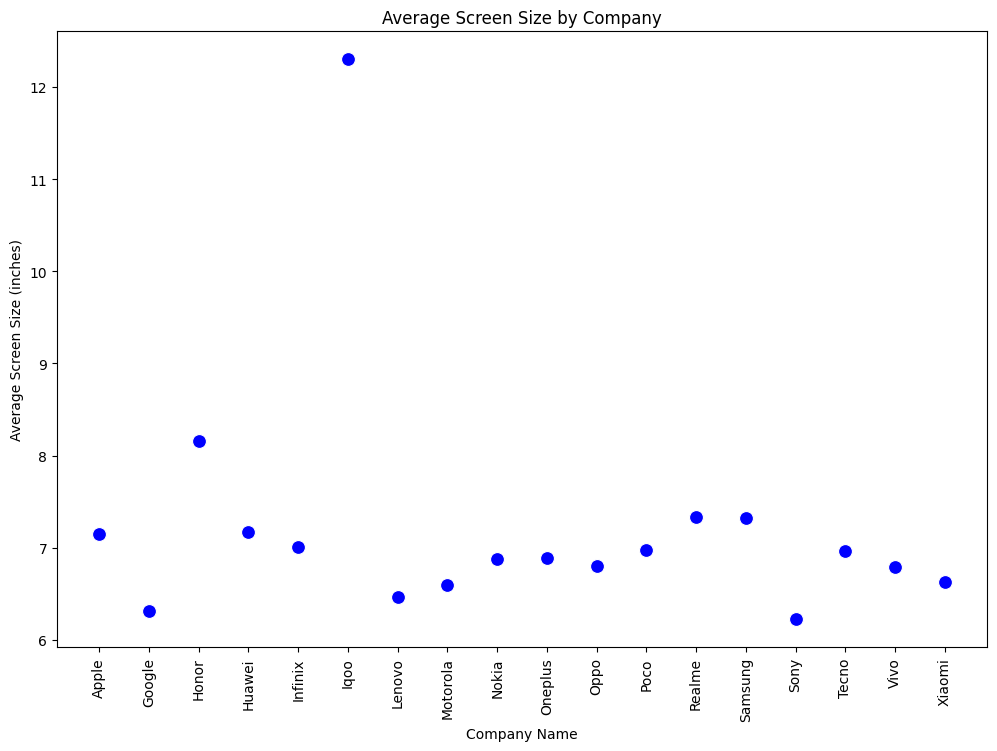

In [306]:
# Convert 'Screen Size' column to float
data['Screen Size'] = data['Screen Size'].str.extract(r'(\d+\.?\d*)')[0].astype(float)

# Calculate the average screen size per company
avg_screen_size_per_company = data.groupby('Company Name')['Screen Size'].mean().reset_index()

# Plot the scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Company Name', y='Screen Size', data=avg_screen_size_per_company, s=100, color='blue')
plt.xticks(rotation=90)
plt.title('Average Screen Size by Company')
plt.xlabel('Company Name')
plt.ylabel('Average Screen Size (inches)')
plt.show()


From the above data we can conclude that the company IQOO has more ScreenSize , since it is producing more no of tabs

If we compare the remaining companies Honor holds the 1st place in the market with better screen size.

# Lets preprocess the columns of launch price in differnect Countries


In [307]:


# Define conversion rates to INR
conversion_rates = {
    'PKR': 0.45,  # Example conversion rate
    'CNY': 11.5,  # Example conversion rate
    'USD': 83.0,  # Example conversion rate
    'AED': 22.5   # Example conversion rate
}

# Columns and their corresponding currency symbols
price_columns = {
    'Launched Price (Pakistan)': 'PKR',
    'Launched Price (India)': 'INR',
    'Launched Price (China)': 'CNY',
    'Launched Price (USA)': 'USD',
    'Launched Price (Dubai)': 'AED'
}

# Convert prices to INR
for column, currency in price_columns.items():
    # Remove commas, extract numeric values, and replace "Not available" with NaN
    data[column] = data[column].astype(str).str.replace(',', '', regex=True).str.extract(r'(\d+\.?\d*)')[0]
    data[column] = pd.to_numeric(data[column], errors='coerce')  # Convert to float, handle NaN
    if currency != 'INR':  # Apply conversion only if not already INR
        data[column] *= conversion_rates[currency]

# Display the result
print(data[price_columns.keys()].head())


   Launched Price (Pakistan)  Launched Price (India)  Launched Price (China)  \
0                  101249.55                   79999                 66688.5   
1                  105749.55                   84999                 70138.5   
2                  110249.55                   89999                 74738.5   
3                  112499.55                   89999                 71288.5   
4                  116999.55                   94999                 74738.5   

   Launched Price (USA)  Launched Price (Dubai)  
0               66317.0                 62977.5  
1               70467.0                 67477.5  
2               74617.0                 71977.5  
3               74617.0                 71977.5  
4               78767.0                 76477.5  


From the above , converted the all columns of launch price into float and converted everything in Indian Currency..

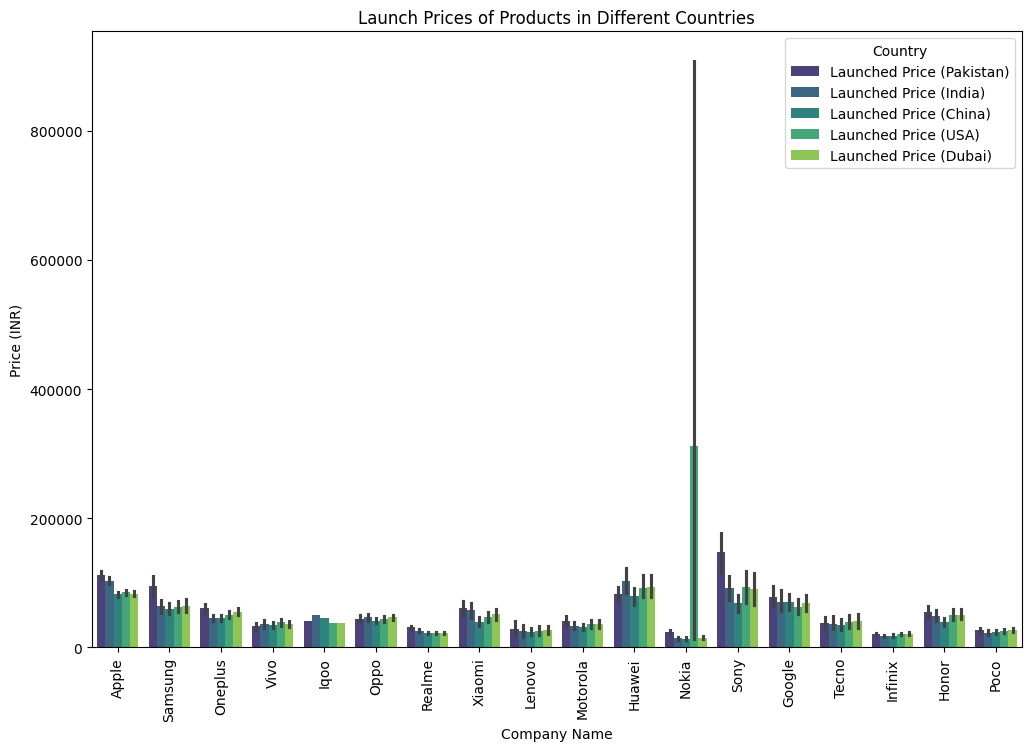

In [308]:
# Melt the dataframe to have a long format suitable for seaborn
melted_data = data.melt(id_vars=['Company Name'], value_vars=price_columns, var_name='Country', value_name='Price')

# Plot the data using seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Company Name', y='Price', hue='Country', data=melted_data, palette='viridis')

# Update layout for better visualization
plt.xticks(rotation=90)
plt.title('Launch Prices of Products in Different Countries')
plt.xlabel('Company Name')
plt.ylabel('Price (INR)')
plt.legend(title='Country')

# Show the plot
plt.show()


Here from the above plot we can conclude that , In which country the mobile is launched with higher price and in which country the mobile is launched with lower price for each company mobiles.

We can track down for each Model phone as well but that many no of models cannot afford the graph to be displayed.

In [309]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 902 entries, 0 to 929
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Company Name               902 non-null    object 
 1   Model Name                 902 non-null    object 
 2   Mobile Weight              902 non-null    float64
 3   RAM(GB)                    902 non-null    float64
 4   Front Camera               902 non-null    object 
 5   Back Camera                902 non-null    object 
 6   Processor                  902 non-null    object 
 7   Battery Capacity           902 non-null    object 
 8   Screen Size                902 non-null    float64
 9   Launched Price (Pakistan)  901 non-null    float64
 10  Launched Price (India)     902 non-null    int64  
 11  Launched Price (China)     902 non-null    float64
 12  Launched Price (USA)       902 non-null    float64
 13  Launched Price (Dubai)     902 non-null    float64
 14 

Here is the detailed EDA for the mobile phone supply from the past to 2025.